# Yahtzee Analysis 

This is a Yahtzee Analysis will analyze a Yahztee Data set provided by Freethedice.com thanks to Kal.  
You can find the data [here](http://www.freethedice.com/dataByGame.csv) and [here](http://www.freethedice.com/dataByPlayer.csv).   

The first link sorts the data by Game and the second sorts by Player. We will be mainly focusing on the first data set to just gain insights on the game itself.

In this analysis, I will go through 5 steps:
1. Clean the Data
2. Visualize the Data
3. Gather useful insights from the Data

### Cleaning the Data  

In this section I will clean the data so that it is easier to work with. Note all code is Python 3 code.

First, I made a function that grabs all of the scores from a column of strings and converts those numbers into an int:

In [2]:
import numpy as np
import pandas as pd
import re
import sys

def fileIntegerParser(file, column):
	''' Input (str,str)
	Takes in a .csv file and a column within that .csv file and
	using regex, grabs all numbers within the column
	and returns the numbers as a list of integers '''

	try:

		df = pd.read_csv(file)
		
		# Finding the scores of each game
		# Pull all of the scores in the data set
		text = [x for x in df[column] if type(x) == str]

		score_value = re.findall(r'\d.', str(text))
		score_value = [int(x) for x in score_value]
		
		return score_value

	except TypeError:
		print("[fileIntegerParser] Type Error")
		sys.exit(1)
	except IOError as e:
		print(("[fileIntegerParser] {} or can\'t read the data from it").format(e))
		sys.exit(1) 
	except ValueError:
		print("[fileIntegerParser] Something went wrong with the file entered, check syntax")
		sys.exit(1)	
	except KeyError as e:
		print(("[fileIntegerParser] {} column was not found in the file").format(e))
		sys.exit(1)	
	except:
		print("[fileIntegerParser] Something went wrong, check the syntax")
		sys.exit(1)

We will use this function throught our analysis. 

It can be imported with the following code (Note: this code must be in the same location as the code where you invoke it)

### Visualize the Data

Next we will graph the data. I am curious to see how many times a given score has occured. We can easily plot this in Python.

First, we Import the required packages

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import pandas as pd
import re

Next we import the data, and grab the integer values from the 'scored?' column in our dataset using our wonderful function we created above.

In [4]:
data_file = 'C:/Users/Erik Sorensen/Desktop/Data/Freethedice.com Yahtzee/dataByGameHeldShift.csv'

In [5]:
scores = fileIntegerParser(data_file,'scored?')

Now we will separate the filtered scores into their own bins so that we can graph a histogram. 

In [6]:
count = np.bincount(scores)

Now that the data is cleaned, lets start to create our graph!  

In [7]:
# Change the figure size
fig = plt.figure(figsize=(15,5))

Now I remove any unecessary chartjunk that clutters the graph:

In [8]:
# Remove unecessary plot frame lines
ax = plt.subplot()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# We only need the ticks on the bottom and left of the graph
# top and right ticks are unessessary 
ax.get_yaxis().tick_left()
ax.get_xaxis().tick_bottom()

# Graph some horizontal dotted lines
for y in range(0,8501 ,1000):
	plt.plot(range(0,66), [y] * len(range(0,66)), "--",lw=0.5, color="black",alpha=0.3);

Now we will plot the axis labels.

In [9]:
# Label the graph
bins = len(count)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.title('Amount of times a given score occured in games of Yahtzee',fontsize=12)
# Plot the axis ticks
plt.yticks(range(0,8501,500), fontsize=8)
plt.xticks(range(bins),fontsize = 8, ha='center')

# set the x axis so it fits the data better
ax.set(xlim=[-1,bins]);

Add a Title:

In [10]:
# Add title to graph
plt.text(33,9000, "Amount of times a given score occured in games of Yahtzee",
		fontsize=16, ha='center');

Add credits and an annotation to tell where we got the data:

In [11]:
# Add text description to graph
plt.text(-5, -1000, "Data Source: Freethedice.com. Complimentary of Kal"
					"\nAuthor: Erik Sorensen (CrypticSl0th)",
					fontsize=8)

# Add annotation to graph
plt.text(50,7500, "Sample size is {} scores".format(len(scores)), 
		fontsize=9,ha='center');

Now we plot the data!

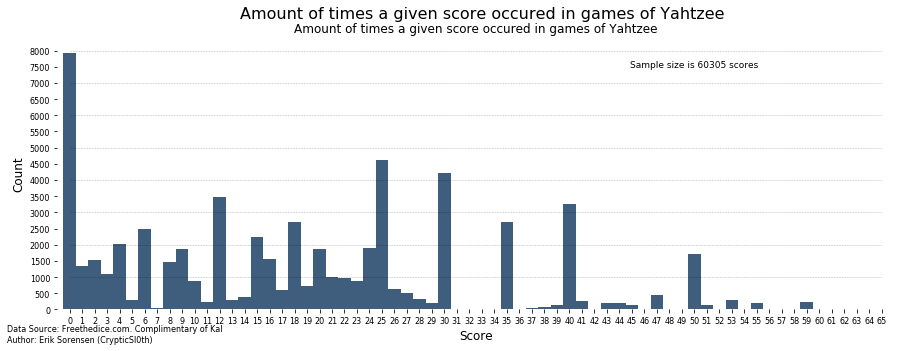

In [12]:
# Plot the data in a bar graph
plt.bar(range(bins), count, width=1, align='center' ,color='#3F5D7D')
plt.show();